# **Proyek Pertama : Membuat Model NLP dengan TensorFlow**
# ***Sumber Data : bbc-news-data***

# **Ari Pratama Putra**
# **aripratama1017@gmail.com**
# **Mahasiswa S-1 Matematika USU**

In [107]:
# load data
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/ Belajar Pengembangan Machine Learning/NLP dengan TensorFlow/Data/bbc-news-data.csv', sep='\t')
df

,category,filename,title,content
0,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...
1,business,002.txt,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...
2,business,003.txt,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...
3,business,004.txt,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...
4,business,005.txt,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...
...,...,...,...,...
2220,tech,397.txt,BT program to beat dialler scams,BT is introducing two initiatives to help bea...
2221,tech,398.txt,Spam e-mails tempt net shoppers,Computer users across the world continue to i...
2222,tech,399.txt,Be careful how you code,A new European directive could put software w...
2223,tech,400.txt,US cyber security chief resigns,The man making sure US computer networks are ...


In [108]:
# hapus fitur yang tidak digunakan
df = df.drop(columns=['filename', 'title'])
df

,category,content
0,business,Quarterly profits at US media giant TimeWarne...
1,business,The dollar has hit its highest level against ...
2,business,The owners of embattled Russian oil giant Yuk...
3,business,British Airways has blamed high fuel prices f...
4,business,Shares in UK drinks and food firm Allied Dome...
...,...,...
2220,tech,BT is introducing two initiatives to help bea...
2221,tech,Computer users across the world continue to i...
2222,tech,A new European directive could put software w...
2223,tech,The man making sure US computer networks are ...


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  2225 non-null   object
 1   content   2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


In [110]:
# melakukan proses one-hot-encoding karena label berupa data ketegorikal
category = pd.get_dummies(df.category)
df = pd.concat([df, category], axis=1)
df = df.drop(columns='category')
df

,content,business,entertainment,politics,sport,tech
0,Quarterly profits at US media giant TimeWarne...,1,0,0,0,0
1,The dollar has hit its highest level against ...,1,0,0,0,0
2,The owners of embattled Russian oil giant Yuk...,1,0,0,0,0
3,British Airways has blamed high fuel prices f...,1,0,0,0,0
4,Shares in UK drinks and food firm Allied Dome...,1,0,0,0,0
...,...,...,...,...,...,...
2220,BT is introducing two initiatives to help bea...,0,0,0,0,1
2221,Computer users across the world continue to i...,0,0,0,0,1
2222,A new European directive could put software w...,0,0,0,0,1
2223,The man making sure US computer networks are ...,0,0,0,0,1


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   content        2225 non-null   object
 1   business       2225 non-null   uint8 
 2   entertainment  2225 non-null   uint8 
 3   politics       2225 non-null   uint8 
 4   sport          2225 non-null   uint8 
 5   tech           2225 non-null   uint8 
dtypes: object(1), uint8(5)
memory usage: 28.4+ KB


In [112]:
# mengkonversikan nilai-nilai dari dataframe ke tipe data numpy array menggunakan atribut values
x = df['content'].values
y = df[['business', 'entertainment', 'politics', 'sport', 'tech']].values

In [113]:
x

array([' Quarterly profits at US media giant TimeWarner jumped 76% to $1.13bn (£600m) for the three months to December, from $639m year-earlier.  The firm, which is now one of the biggest investors in Google, benefited from sales of high-speed internet connections and higher advert sales. TimeWarner said fourth quarter sales rose 2% to $11.1bn from $10.9bn. Its profits were buoyed by one-off gains which offset a profit dip at Warner Bros, and less users for AOL.  Time Warner said on Friday that it now owns 8% of search-engine Google. But its own internet business, AOL, had has mixed fortunes. It lost 464,000 subscribers in the fourth quarter profits were lower than in the preceding three quarters. However, the company said AOL\'s underlying profit before exceptional items rose 8% on the back of stronger internet advertising revenues. It hopes to increase subscribers by offering the online service free to TimeWarner internet customers and will try to sign up AOL\'s existing customers fo

In [114]:
y

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1]], dtype=uint8)

In [115]:
# membagi data training & data testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [116]:
# tokenizer & padding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=5000, oov_token='x')
tokenizer.fit_on_texts(x_train)
tokenizer.fit_on_texts(x_test)

sekuens_train = tokenizer.texts_to_sequences(x_train)
sekuens_test = tokenizer.texts_to_sequences(x_test)

padded_train = pad_sequences(sekuens_train)
padded_test = pad_sequences(sekuens_test)

In [117]:
# arsitektur model menggunakan layer Embedding
import tensorflow as tf
model = tf.keras.Sequential([
        tf.keras.layers.Embedding(input_dim=5000, output_dim=16),
        tf.keras.layers.LSTM(64),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(5, activation='softmax')])

In [118]:
# membuat model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [119]:
# mengimplementasikan callback 80%
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9 and logs.get('val_accuracy')>0.9):
      print("\nAkurasi telah mencapai > 80%!")
      self.model.stop_training = True
callbacks = myCallback()

In [120]:
# melatih model
num_epochs = 30
hist = model.fit(padded_train,
                    y_train,
                    batch_size=128,
                    callbacks=[callbacks],
                    epochs=num_epochs,
                    validation_data=(padded_test, y_test),
                    verbose=2)

Epoch 1/30
14/14 - 79s - loss: 1.6092 - accuracy: 0.2129 - val_loss: 1.6078 - val_accuracy: 0.2292
Epoch 2/30
14/14 - 77s - loss: 1.6080 - accuracy: 0.2236 - val_loss: 1.6058 - val_accuracy: 0.2292
Epoch 3/30
14/14 - 77s - loss: 1.6047 - accuracy: 0.2292 - val_loss: 1.5990 - val_accuracy: 0.2742
Epoch 4/30
14/14 - 77s - loss: 1.5884 - accuracy: 0.3034 - val_loss: 1.5578 - val_accuracy: 0.4360
Epoch 5/30
14/14 - 77s - loss: 1.5277 - accuracy: 0.3770 - val_loss: 1.2852 - val_accuracy: 0.4697
Epoch 6/30
14/14 - 77s - loss: 1.3608 - accuracy: 0.4242 - val_loss: 1.3019 - val_accuracy: 0.4652
Epoch 7/30
14/14 - 76s - loss: 1.2235 - accuracy: 0.4528 - val_loss: 1.0798 - val_accuracy: 0.5056
Epoch 8/30
14/14 - 77s - loss: 1.0373 - accuracy: 0.5073 - val_loss: 0.9444 - val_accuracy: 0.5730
Epoch 9/30
14/14 - 77s - loss: 0.8986 - accuracy: 0.5921 - val_loss: 0.8825 - val_accuracy: 0.6180
Epoch 10/30
14/14 - 76s - loss: 0.8098 - accuracy: 0.6101 - val_loss: 1.0648 - val_accuracy: 0.5685
Epoch 11/

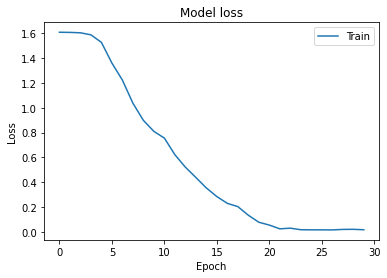

In [122]:
# plot loss
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

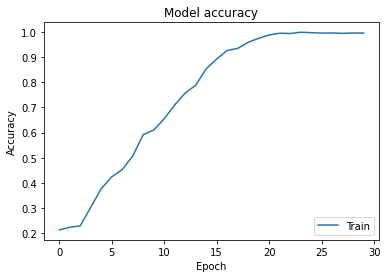

In [123]:
# plot accuracy
plt.plot(hist.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='lower right')
plt.show()